In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding=('ISO-8859-1'),low_memory=False)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
932,ham,So do you have samus shoulders yet,NaN,NaN,NaN
4762,ham,Prepare to be pleasured :),NaN,NaN,NaN
3234,ham,"Yes, princess. Toledo.",NaN,NaN,NaN
4107,ham,Pls send me your address sir.,NaN,NaN,NaN
4559,ham,I'm awake oh. What's up.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1. cleaning dataset

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Target']=l.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check duplicate value
df.duplicated().sum()

403

In [14]:
# remove duplicate value
df.drop_duplicates(inplace=True)

In [15]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5169, 2)

## 2. EDA

In [17]:
# check values count in target data
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

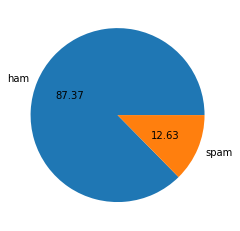

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [19]:
# data is imbalance

In [20]:
df['num_character']=df['Text'].apply(len)

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['word_length']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Target,Text,num_character,word_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentances']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,Text,num_character,word_length,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# decribe the given data 
df[['num_character','num_sentances','word_length']].describe()

,num_character,num_sentances,word_length
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.961308,18.455407
std,58.236293,1.432583,13.322448
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [27]:
# ham
df[df['Target']==0][['num_character','num_sentances','word_length']].describe()

,num_character,num_sentances,word_length
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.815545,17.123339
std,56.358207,1.364098,13.491315
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [28]:
# spam
df[df['Target']==1][['num_character','num_sentances','word_length']].describe()

,num_character,num_sentances,word_length
count,653.000000,653.000000,653.000000
mean,137.891271,2.969372,27.667688
std,30.137753,1.488910,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

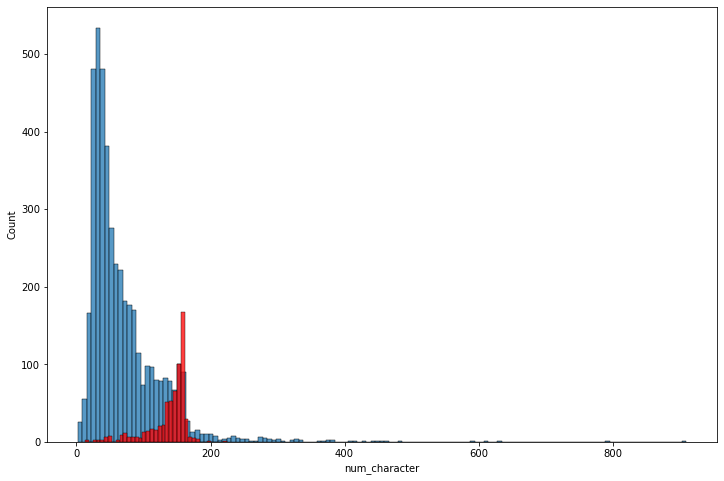

In [29]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'],color='red')

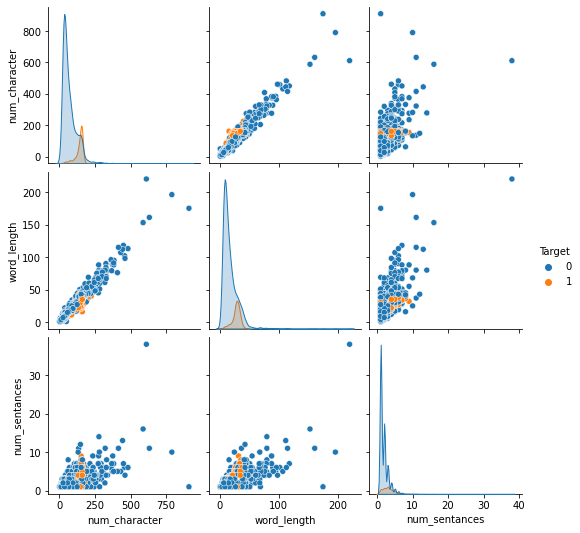

In [30]:
sns.pairplot(df,hue='Target')

In [31]:
df.corr()

,Target,num_character,word_length,num_sentances
Target,1.000000,0.384717,0.262969,0.267602
num_character,0.384717,1.000000,0.965784,0.626118
word_length,0.262969,0.965784,1.000000,0.680882
num_sentances,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

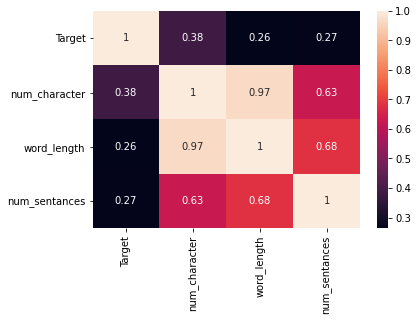

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [34]:
def test_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [35]:
test_transform('i loving dancing and music')

'love danc music'

In [36]:
df['transform_text']=df['Text'].apply(test_transform)

In [37]:
df.head()

,Target,Text,num_character,word_length,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
df.shape

(5169, 6)

In [39]:
spam_msg=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        
        spam_msg.append(word)

In [40]:
len(spam_msg)

9939

In [41]:
ham_msg=[]
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_msg.append(word)

In [42]:
len(ham_msg)

35402

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


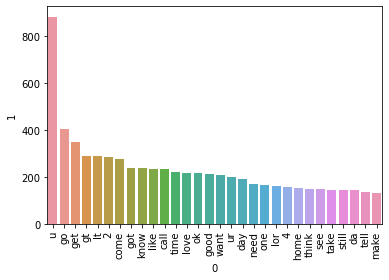

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_msg).most_common(30))[0],pd.DataFrame(Counter(ham_msg).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


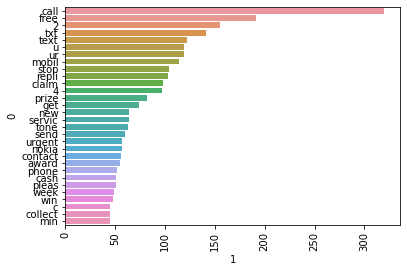

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_msg).most_common(30))[1],pd.DataFrame(Counter(spam_msg).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [45]:
# count vector
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['transform_text']).toarray()

In [46]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
y=df['Target'].values

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [51]:
bn=BernoulliNB()
gn=GaussianNB()
mn=MultinomialNB()

In [52]:
bn.fit(x_train,y_train)
gn.fit(x_train,y_train)
mn.fit(x_train,y_train)

MultinomialNB()

In [53]:
predict_bn=bn.predict(x_test)
predict_gn=gn.predict(x_test)
predict_mn=mn.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
# bernollinb
print('Bernollinb')
print('accuracy',accuracy_score(y_test,predict_bn))
print('matrix',confusion_matrix(y_test,predict_bn))
print('precision score',precision_score(y_test,predict_bn))

Bernollinb
accuracy 0.9661508704061895
matrix [[881   4]
 [ 31 118]]
precision score 0.9672131147540983


In [56]:
# multinomial
print('multinomial')
print('accuracy',accuracy_score(y_test,predict_mn))
print('matrix',confusion_matrix(y_test,predict_mn))
print('precision',precision_score(y_test,predict_mn))

multinomial
accuracy 0.9709864603481625
matrix [[869  16]
 [ 14 135]]
precision 0.8940397350993378


In [57]:
#GaussianNB
print('GaussianNb')
print('accuracy',accuracy_score(y_test,predict_gn))
print('matrix',confusion_matrix(y_test,predict_gn))
print('precision',precision_score(y_test,predict_gn))

GaussianNb
accuracy 0.8762088974854932
matrix [[774 111]
 [ 17 132]]
precision 0.5432098765432098


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tf=TfidfVectorizer()

In [60]:
x=tf.fit_transform(df['transform_text']).toarray()

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
g=GaussianNB()
m=MultinomialNB()
b=BernoulliNB()

In [90]:
g.fit(x_train,y_train)
m.fit(x_train,y_train)
b.fit(x_train,y_train)

BernoulliNB()

In [91]:
gp=g.predict(x_test)
mp=m.predict(x_test)
bp=b.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [93]:
print('gaussian',confusion_matrix(y_test,gp))
print('multinomial',confusion_matrix(y_test,mp))
print('benoulli',confusion_matrix(y_test,bp))

gaussian [[972 163]
 [ 25 133]]
multinomial [[1135    0]
 [  50  108]]
benoulli [[1131    4]
 [  35  123]]


In [94]:
print('gaussian',accuracy_score(y_test,gp))
print('multinomial',accuracy_score(y_test,mp))
print('benoulli',accuracy_score(y_test,bp))

gaussian 0.8546017014694509
multinomial 0.9613302397525135
benoulli 0.9698375870069605


In [95]:
print('gaussian',precision_score(y_test,gp))
print('multinomial',precision_score(y_test,mp))
print('benoulli',precision_score(y_test,bp))

gaussian 0.44932432432432434
multinomial 1.0
benoulli 0.968503937007874


In [97]:
import pickle
pickle.dump(tf,open('tf_vector.pkl','wb'))
pickle.dump(m,open('model.pkl','wb'))